In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-disorders-dataset/Mental disorder symptoms.xlsx


In [2]:
Mental_disorders_path = '/kaggle/input/mental-disorders-dataset/Mental disorder symptoms.xlsx'
df = pd.read_excel(Mental_disorders_path)

In [3]:
df.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ag+1:629e                    637 non-null    int64 
 1   feeling.nervous              637 non-null    int64 
 2   panic                        637 non-null    int64 
 3   breathing.rapidly            637 non-null    int64 
 4   sweating                     637 non-null    int64 
 5   trouble.in.concentration     637 non-null    int64 
 6   having.trouble.in.sleeping   637 non-null    int64 
 7   having.trouble.with.work     637 non-null    int64 
 8   hopelessness                 637 non-null    int64 
 9   anger                        637 non-null    int64 
 10  over.react                   637 non-null    int64 
 11  change.in.eating             637 non-null    int64 
 12  suicidal.thought             637 non-null    int64 
 13  feeling.tired                637 no

In [5]:
df = df.rename(columns={'ag+1:629e':'age'})
df = df.rename(columns={'having.trouble.in.sleeping':'trouble.sleeping'})
df = df.rename(columns={'having.trouble.with.work':'trouble.with.work'})
df = df.rename(columns={'having.nightmares':'nightmares'})

df.set_index(['age'])

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,over.react,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
age,,,,,,,,,,,,,,,,,,,,,
23,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,MDD
14,1,0,1,0,0,1,0,0,1,1,...,1,1,0,0,0,0,1,0,0,ASD
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
29,1,0,0,0,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,bipolar
32,1,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,anexiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,eating disorder
27,1,0,1,0,0,0,0,1,1,0,...,1,0,1,1,1,0,0,0,0,PDD
19,0,1,0,0,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,1,ASD


Some preliminary data visualisation and analysis

<Axes: xlabel='age', ylabel='Count'>

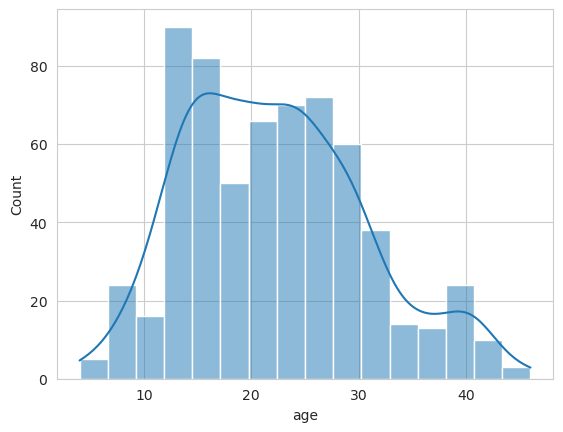

In [6]:
# Histogram of Age Profile
sns.histplot(df.age, kde=True)

Looks like an amalgamation of a few distributions, with onset of MH problems occurring in youth, late 20s and 40s.

In [7]:
# Look for incidences of the various symptoms
symptom_incidences = df[df.columns[1:27]].sum()

<Axes: title={'center': 'Incidences of Various Mental Health Symptoms'}>

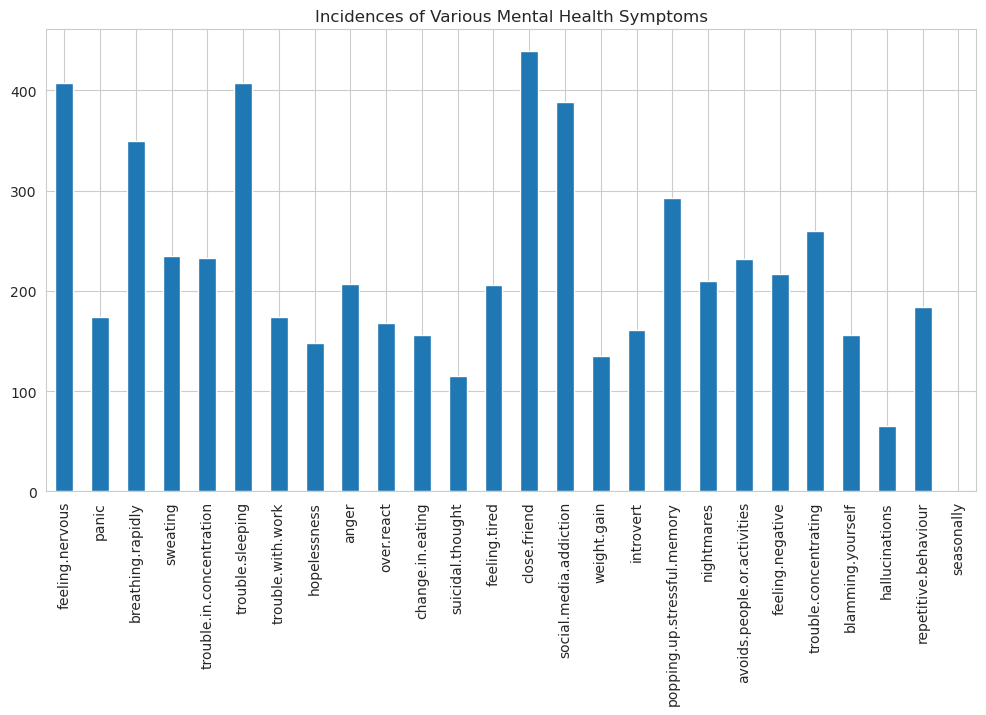

In [8]:
symptom_incidences.plot.bar(figsize=(12,6), title = 'Incidences of Various Mental Health Symptoms')

In [9]:
# Get list of unique disorders
Disorders = df.Disorder.unique()
Disorders
# Note that this is reset later, to be given in the order used by the model

array(['MDD', 'ASD', 'Loneliness', 'bipolar', 'anexiety', 'PTSD',
       'sleeping disorder', 'psychotic deprission', 'eating disorder',
       'ADHD', 'PDD', 'OCD'], dtype=object)

In [10]:
# Correct spelling mistakes
df.Disorder = df.Disorder.str.replace('psychotic deprission', 'psychotic depression')
df.Disorder = df.Disorder.str.replace('anexiety','anxiety')

In [11]:
symptoms = list(df.columns) # Likely to be useful later
symptoms.remove('age')

<Axes: >

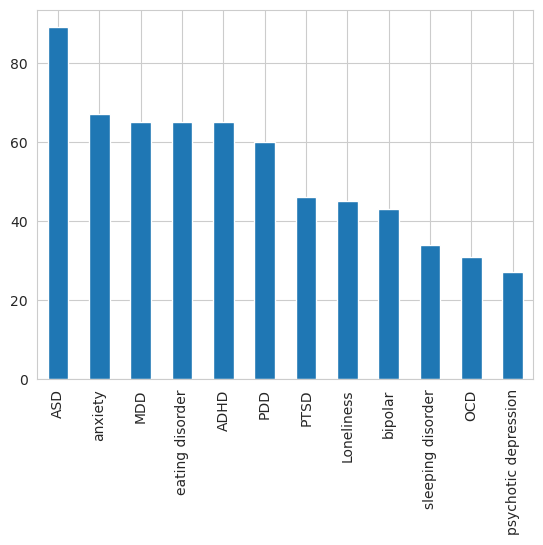

In [12]:
# Sum the total incidences of each diagnosed disorder.
incidences = df.Disorder.value_counts()
incidences.plot.bar()
# This assumes that each person has only one diagnosed disorder, and appears only once in the dataset.
# Secondary diagnoses - which are common - are ignored

In [13]:
# Look for NaN values:
df[df.isna().any(axis=1)]
# None found

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder


In [14]:
# Look for any symptom incidence values that are neither 0 or 1
errors = df[(df.iloc[:,1:27] > 1).any(axis=1)]
errors
# None found

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder


In [15]:
# Reminder before ML starts
df

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,23,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,eating disorder
633,27,1,0,1,0,0,0,0,1,1,...,1,0,1,1,1,0,0,0,0,PDD
634,19,0,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,1,ASD
635,16,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop(['Disorder'], axis=1)

In [18]:
y = pd.get_dummies(df['Disorder'])

In [19]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=0)
my_model = DecisionTreeRegressor()
my_model.fit(train_X, train_y)

DecisionTreeRegressor()

In [20]:
val_predictions = my_model.predict(val_X)
print(mean_absolute_error(val_y,val_predictions))

0.0028645833333333336


In [21]:
val_y

,ADHD,ASD,Loneliness,MDD,OCD,PDD,PTSD,anxiety,bipolar,eating disorder,psychotic depression,sleeping disorder
453,1,0,0,0,0,0,0,0,0,0,0,0
482,0,0,0,0,0,1,0,0,0,0,0,0
516,0,0,0,0,0,0,0,0,0,1,0,0
542,0,0,0,0,1,0,0,0,0,0,0,0
85,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
616,1,0,0,0,0,0,0,0,0,0,0,0
175,0,0,1,0,0,0,0,0,0,0,0,0
211,0,0,0,0,0,0,0,1,0,0,0,0
467,0,0,0,0,0,0,1,0,0,0,0,0


In [22]:
Disorders = list(val_y.columns)

In [23]:
val_y_index = list(val_y.index)
# val_y_index
# Will want this later to keep the entries in order

In [24]:
val_predictions

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# Frustratingly, the DecisonTreeRegressor returns an array of floating point numbers. Convert back to DataFrame of integers
results = pd.DataFrame(val_predictions, columns=Disorders)
for columns in results:
    results = results.astype({columns:'int'})
results

,ADHD,ASD,Loneliness,MDD,OCD,PDD,PTSD,anxiety,bipolar,eating disorder,psychotic depression,sleeping disorder
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,0,0,0,0,0,0,0,0,0,0,0
156,0,0,1,0,0,0,0,0,0,0,0,0
157,0,0,0,0,0,0,0,1,0,0,0,0
158,0,0,0,0,0,0,1,0,0,0,0,0


In [26]:
# Checking again for errors in returned results.  No errors found.
errors = results[(results.iloc[:,:] > 1).any(axis=1)]
errors

,ADHD,ASD,Loneliness,MDD,OCD,PDD,PTSD,anxiety,bipolar,eating disorder,psychotic depression,sleeping disorder


In [27]:
# Look to see if some rows have '0s' in every column, i.e. the results of the decision tree model were inconclusive.
# Need to catch these into another column.
Inconclusive = (results == 0).astype(int).sum(axis=1)

In [28]:
# Reset this new variable 'Inconclusive' to 0 or 1, instead of 11 or 12
for n in range(len(Inconclusive)):
    if Inconclusive[n] == 12:
        Inconclusive[n] = 1
    else:
        Inconclusive[n] = 0
# Inconclusive

In [29]:
# Add in the Inconclusive results column and show occurrances
results['Inconclusive'] = Inconclusive
results[results['Inconclusive'] == 1]

,ADHD,ASD,Loneliness,MDD,OCD,PDD,PTSD,anxiety,bipolar,eating disorder,psychotic depression,sleeping disorder,Inconclusive
1,0,0,0,0,0,0,0,0,0,0,0,0,1
12,0,0,0,0,0,0,0,0,0,0,0,0,1
68,0,0,0,0,0,0,0,0,0,0,0,0,1
69,0,0,0,0,0,0,0,0,0,0,0,0,1
77,0,0,0,0,0,0,0,0,0,0,0,0,1
120,0,0,0,0,0,0,0,0,0,0,0,0,1
138,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
# Convert results dataFrame back to list of diagnoses, including option for Inconclusive result
results = pd.from_dummies(results)
#results

In [31]:
# Look to see if some rows have '0s' in every column, i.e. the Original data was inconclusive.
# Need to catch these into another column.
Inconclusive_original = (val_y == 0).astype(int).sum(axis=1)
if Inconclusive_original.sum() == len(Inconclusive_original)*11:
    print('No Inconclusive diagnoses in original data')

No Inconclusive diagnoses in original data


In [32]:
# Convert val_y back to original column
val_y = pd.from_dummies(val_y)
val_y['Index'] = val_y_index
val_y.set_index('Index')
val_y

,,Index
0,ADHD,453
1,PDD,482
2,eating disorder,516
3,OCD,542
4,MDD,85
...,...,...
155,ADHD,616
156,Loneliness,175
157,anxiety,211
158,PTSD,467


In [33]:
# Pull both original validation data and results into same df for easy comparison
comparison = pd.concat([val_y , results], axis=1)
comparison

,,Index,
0,ADHD,453,ADHD
1,PDD,482,Inconclusive
2,eating disorder,516,eating disorder
3,OCD,542,OCD
4,MDD,85,MDD
...,...,...,...
155,ADHD,616,ADHD
156,Loneliness,175,Loneliness
157,anxiety,211,anxiety
158,PTSD,467,PTSD


In [34]:
# Run a loop to count and display prediction errors
n_errors = 0
for n in range(159):
    if comparison.iloc[n,0] != comparison.iloc[n,2]:
        print('Error in prediction. Original diagnosis:', comparison.iloc[n,0],'  Model prediction:',comparison.iloc[n,2])
        n_errors +=1
print('The total number of diagnosis errors were: ', n_errors)

Error in prediction. Original diagnosis: PDD   Model prediction: Inconclusive
Error in prediction. Original diagnosis: MDD   Model prediction: Inconclusive
Error in prediction. Original diagnosis: PDD   Model prediction: Inconclusive
Error in prediction. Original diagnosis: MDD   Model prediction: Inconclusive
Error in prediction. Original diagnosis: PDD   Model prediction: Inconclusive
Error in prediction. Original diagnosis: PDD   Model prediction: Inconclusive
Error in prediction. Original diagnosis: PDD   Model prediction: Inconclusive
The total number of diagnosis errors were:  7
